In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import pickle 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./Data/train.csv')

In [3]:
lemmatizer = WordNetLemmatizer()
def clean_up(x):
    s = re.sub('[^a-zA-Z]'," ", x)
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(s)
    filtered_sentence = [w.lower() for w in word_tokens if not w.lower() in stop_words]
    fin = []
    for w in filtered_sentence:
        fin.append(lemmatizer.lemmatize(w))
    return " ".join(fin)

In [4]:
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [5]:
df.drop(['index','id', 'title', 'author'], axis=1, inplace=True)


In [6]:
df.head()

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1


In [8]:
df['text'] = df['text'].apply(lambda x: clean_up(x))

In [9]:
df.to_csv('./Data/cleaned.csv', index=False)

In [10]:
X = df['text'].apply(lambda x: clean_up(x))

KeyboardInterrupt: 

In [ ]:
Y = df['label']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.8, random_state = 2)

In [ ]:
cv = CountVectorizer()
x_train = cv.fit_transform(X_train)
x_test = cv.transform(X_test)

In [ ]:
input_text = """PALO ALTO, Calif.  —   After years of scorning the political process, Silicon Valley has leapt into the fray. The prospect of a President Donald J. Trump is pushing the tech community to move beyond its traditional role as donors and to embrace a new existence as agitators and activists. A distinguished venture capital firm emblazoned on its corporate home page an earthy   epithet. One prominent tech chieftain says the consequences of Mr. Trump’s election would “range between disastrous and terrible. ” Another compares him to a dictator. And nearly 150 tech leaders signed an open letter decrying Mr. Trump and his campaign of “anger” and “bigotry. ” Not quite all the action is  . Peter Thiel, a founder of PayPal and Palantir who was the first outside investor in Facebook, spoke at the Republican convention in July. The New York Times reported on Saturday that Mr. Thiel is giving $1. 25 million to support Mr. Trump’s candidacy even as other supporters flee. (He also recently gave $1 million to a “super PAC” that supports Senator Rob Portman, the Republican freshman running for   in Ohio.) Getting involved in politics used to be seen as clashing with Silicon Valley’s value system: You transform the world by making problems obsolete, not solving them through Washington. Nor did entrepreneurs want to alienate whatever segment of customers did not agree with them politically. Such reticence is no longer in style here. “We’re a bunch of nerds not used to having a lot of limelight,” said Dave McClure, an investor who runs a tech incubator called 500 Startups. “But to quote   ‘With great power comes great responsibility. ’” Mr. McClure grew worried after the Republican and Democratic conventions as Mr. Trump began to catch up to Hillary Clinton in the polls. He wanted Silicon Valley to do more, and so late last month he announced Nerdz4Hillary, an informal   effort. An initial group of donors pledged $50, 000 the goal was to ask the “nerdz” for small donations to match that sum. They have not come through yet. “We’re kind of optimistic we’ll get the other $50, 000 in a few weeks,” Mr. McClure said. That relatively slow pace reflects Silicon Valley’s shifting position: Even as it becomes increasingly free with its opinions, it has been less free with its checkbook. The most recent data, from late August, shows Mrs. Clinton taking in $7. 7 million from the tech community, according to Crowdpac, a   that tracks donations. By that point in 2012, Crowdpac says, President Obama had raised $21 million from entrepreneurs and venture capitalists. Reid Hoffman, the billionaire   of the business networking site LinkedIn, offers a snapshot of Silicon Valley’s evolving approach to politics. Mr. Hoffman was a top Obama donor, giving $1 million to the Priorities USA political action committee, something several of his peers did as well. Last month, Mr. Hoffman garnered worldwide publicity for saying he would donate up to $5 million to veterans’ groups if Mr. Trump released his taxes, a remote possibility that never came to pass. He has castigated Mr. Trump in interviews, saying he was speaking for those who were afraid. Mr. Hoffman’s outright donations, however, have been smaller this election cycle. In May, he gave $400, 000 to the Hillary Victory Fund. Asked if there was more recent giving that had not shown up in federal election records, Mr. Hoffman cryptically responded in an email, “Looking at some PACs, etc. ” He declined several opportunities to elaborate. Even as Priorities USA has raised $133 million this election cycle, far exceeding its total in 2012, its tech contributions have dwindled. The only familiar tech name this time around is John Doerr of the venture capital firm Kleiner Perkins Caufield  Byers, who gave $500, 000. The AOL   Steve Case said his September endorsement of Mrs. Clinton, via an   in The Washington Post, was the first time he ever publicly declared for a candidate. “I always focused on policy and avoided politics,” he said. “But if Trump were elected president, I would be disappointed in myself for not acting. ” When he wrote the   he was uncertain about donating money to Mrs. Clinton, saying only that it was “probable. ” A spokeswoman said Sunday that Mr. Case gave $25, 000 to the Hillary Victory Fund. Mason Harrison, Crowdpac’s head of communications, offered a possible reason for Mrs. Clinton’s    support. “Donors give to support candidates they love, not to defeat candidates they fear,” he said. A few billionaires are acting instead of talking. Dustin Moskovitz, a founder of Facebook, said he was giving $20 million to various Democratic election efforts  —   the first time he and his wife, Cari Tuna, have endorsed a candidate. He declined to be interviewed. Part of the problem for Mrs. Clinton is that, however preferable she may be to Mr. Trump in the tech community, she pales in comparison to President Obama. After some initial misgivings, Silicon Valley found its champion in him. There has been a revolving door between tech and the Obama administration, just as previous Democratic administrations had a revolving door with Wall Street. In June, President Obama seemed to suggest that he might become a venture capitalist after his term ends. Mrs. Clinton is not as enthusiastic toward Silicon Valley and its disruptive ways. In a speech in the summer of 2015, she noted that   in the “  or   gig economy”  —   Uber, Airbnb and their ilk  —   were “unleashing innovation” but also “raising hard questions about workplace protection and what a good job will look like in the future. ” The Clinton campaign declined to comment. The Trump campaign did not respond to a query. Even as Silicon Valley works against Mr. Trump, there is quiet acknowledgment that his campaign has bared some important issues. In an endorsement this month of Mrs. Clinton, the venture capital firm Union Square Ventures pointed out that “the benefits of technology and globalization have not been evenly distributed,” and that this needed to change. If Silicon Valley’s political involvement outlasts this unusual election, the tech community may start contributing more to the process than commentary and cash. “Not only are tech people going to be wielding influence, but they’re going to be the candidate,” Mr. McClure said. “Reid Hoffman, Sheryl Sandberg”  —   the chief operating officer of Facebook  —   “and a bunch of other folks here have political aspirations. ” Others may be inspired to enter politics through other doors. Palmer Luckey is the    founder of the Oculus virtual reality company, which he sold to Facebook for $2 billion. Mr. Luckey donated $10, 000 to a group dedicated to spreading    messages about Mrs. Clinton both online and off. The group’s first billboard, said to be outside Pittsburgh, labeled her “Too Big to Jail. ” Mr. Luckey told The Daily Beast that his thinking “went along the lines of, ‘Hey, I have a bunch of money. I would love to see more of this stuff. ’” He added, “I thought it sounded like a real jolly good time. ” Many virtual reality developers were less happy, and Mr. Luckey quickly posted his regrets on Facebook. He declined to comment further. “If we’re going to be more vocal, we’ll have to live more transparently,” said Hunter Walk, a venture capitalist whose campaign to persuade tech companies to give workers Election Day off signed up nearly 300 firms, including Spotify, SurveyMonkey and TaskRabbit. “There will be a period of adjustment. ” But perhaps being vocal is a temporary condition after all. The venture firm CRV was in the spotlight at the end of August with its blunt   message, which included the earthy epithet. A few weeks later, it cleaned up its website. The partners went from employing a publicist to seek out attention to declining interviews. “We reached everyone we wanted to reach, and hopefully influenced opinions,” said Saar Gur, a CRV venture capitalist. “Then the buzz died down and we went back to our day jobs, which are super busy. ”"""

In [26]:
input_text = """Increasingly affordable and easy to do,   immersion cooking has become trendy among food nerds who want precise control over the doneness of their meats. Sous vide, which means “under vacuum” in French, involves sealing food in an airtight bag and giving it a   bath. A cylindrical gadget gently circulates and heats the water to a precise, consistent temperature, allowing the food to reach the exact temperature the cook desires without the risk of overcooking. Its advocates say the method is the key to attaining a piece of meat that is uniformly tender and juicy inside. But gosh, it can take forever. Enthusiasts who sing the praises of sous vide often try to indoctrinate home cooks with the holy grail of recipes: the perfect   steak. Set the device to heat up the water to around 129 degrees, immerse the bagged steak in the water and, like magic, you have a steak that is perfectly   all the way through, not just in the center. Give it a sear to brown the crust, and it’s close to something you would get at a steakhouse. Glossed over in that sales pitch is the part where sous vide takes at least an hour to cook the steak, or up to 10 times longer than it would using conventional methods, like a stove or grill. Herein lies the problem. Yes, cooking sous vide is more affordable than ever, with   devices ranging from $100 to $300, but the technique may feel impractical and inaccessible to the average home cook, particularly one with a demanding schedule. The plethora of   recipes published online are largely aimed at perfectionist cooks who have time on their hands. But what if sous vide actually made life easier for the home cook, even on weeknights? J. Kenji   the managing culinary director of the website Serious Eats and the author of “The Food Lab,” a cookbook about the science of cooking, said that the   machine could leave the realm of specialty cooking and enter the world of convenience if people just planned ahead weekly or monthly. “Most people, when they think about dinner, say, ‘What can I get at the grocery store now and get going tonight? ’” he said. “It requires a lot more forethought. ” It also requires bigger thinking  —   as in bigger than a single steak. To fit sous vide into his schedule, Grant Crilly, a founder of ChefSteps, a recipe website and technology company in Seattle that is devoted to the cooking method, turns to two economical cuts of meat, the pork shoulder or beef chuck roast, which cost roughly $4 to $10 a pound at a grocery store and are far less expensive than buying a comparable number of steaks. Mr. Crilly, a chef who was part of the team that produced Nathan Myhrvold’s “Modernist Cuisine” cookbook, cooks the meat sous vide for 24 hours, and then divides it into   steaks. Each steak gets sealed in a plastic sandwich bag and moved to the freezer, creating a protein stockpile that can be easily transformed into delectable meals. When Mr. Crilly is ready to cook, he transfers the meat straight from the freezer into heated water and waits about 75 minutes for it to thaw. It’s kind of like gourmet astronaut food. From there, it’s up to the home cook’s imagination how to use the beef or pork. There’s the obvious, like a juicy boneless pork chop or beef steak: Add seasoning and give it a sear on the stove. Instant ramen can be upgraded into a chashu pork ramen. For taco night, grab the tortillas, slice the meat and fry it with some salt, pepper and onion. Pork shoulder and beef chuck are very tough cuts that are typically   until they collapse into  : think pulled pork or pot roast. But cooking them sous vide does something special. The muscles in the shoulders are among the most actively used, which means the cut contains more collagen and flavor than the more tender options in the butcher case. A long   bath breaks down the collagens while keeping the texture of the meat intact. The softened collagens act like a lubricant in your mouth. The result is a beef or pork steak that tastes even juicier and more flavorful than a   or pork chop  —   as tender as you can imagine, but not falling apart until it hits your tongue, Mr. Crilly said. “Cook it slow, unlock all that really beautiful flavor, and you’ve got a really nice piece of meat,” he said. And starting dinner prep with a versatile piece of meat that’s already cooked through, tender and flavorful is a boon to any home cook. “You end up with this instant upgrade to any dish,” Mr. Crilly said. He added that one night, when he and his wife returned exhausted from a long day of work, he reheated a frozen pork chop using sous vide, diced the meat into cubes and quickly   it with vegetables for a satisfying dinner. The caveat is that 24 hours to cook a large slab of meat is a long time. Also, thawing frozen meat in a   bath, as Mr. Crilly does, takes at least an hour. But to him, the   is worth it. One day of prep work yields a few months’ worth of protein that can be quickly paired with items already in his refrigerator or pantry. The actual cooking is unattended and extraordinarily forgiving. It’s all but impossible to overcook meat sous vide, because the water bath stays at the temperature that you want the food to reach. And during that hour it takes a frozen steak to thaw, Mr. Crilly bakes potatoes or throws together a salad. With some forethought, you can even save yourself a little time before dinner. In the morning, you could heat a pot of water with the   machine, throw in a frozen beef or pork steak and let it cook all day. By the time you get home, the meat is ready to be seared and devoured. Or you could do as Mr.   does. In the morning, he moves some of the raw salmon or halibut pieces he keeps in the freezer to the refrigerator to let them thaw throughout the day. When his wife gets home from work, he turns on his   device and throws the fish in the pot for 30 minutes to cook it. “It probably takes you about the same amount of effort to turn on the   device and put the food in there as it does to place a delivery order with your phone,” he said."""

In [ ]:
vector_input = cv.transform([input_text])

In [ ]:
vector_input.shape

In [ ]:
x_train.shape

In [38]:
log_model = LogisticRegression(solver='liblinear', max_iter=5000, C=0.00035)
log_model.fit(x_train, Y_train)

LogisticRegression(C=0.00035, max_iter=5000, solver='liblinear')

In [34]:
loaded_model = pickle.load(open('./Model/fake_news_model.sav', 'rb'))

In [54]:
log_model.predict(x_test)

array([0, 1, 1, ..., 0, 1, 0])

In [55]:
print("average_precision_score for train set: {}".format(accuracy_score(log_model.predict(x_train),Y_train)))
print("average_precision_score for test set: {}".format(accuracy_score(log_model.predict(x_test),Y_test)))


average_precision_score for train set: 0.9248017500683621
average_precision_score for test set: 0.9007383100902379


In [3]:
df = pd.read_csv('./Data/train.csv')
#df.head()

In [3]:
df.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [4]:
df.dropna(inplace=True)
#df.isna().sum()

In [5]:
df.reset_index(inplace=True)
#df.head(10)

In [6]:
df.drop(['index', 'id', 'title', 'author'], axis=1, inplace=True)
#df.head()

In [7]:
lemmatizer = WordNetLemmatizer()
def clean_up(x):
    s = re.sub('[^a-zA-Z]'," ", x)
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(s)
    filtered_sentence = [w.lower() for w in word_tokens if not w.lower() in stop_words]
    fin = []
    for w in filtered_sentence:
        fin.append(lemmatizer.lemmatize(w))
    return " ".join(fin)

In [8]:
df['text'] = df['text'].apply(lambda x: clean_up(x))

In [9]:
df.to_csv('./Data/cleaned.csv')

In [13]:
X = df['text']
Y = df['label']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.8, random_state = 2)

In [15]:
cv = CountVectorizer( max_features = 5000, ngram_range = (1,3))
x_train = cv.fit_transform(X_train)
x_test = cv.transform(X_test)

In [16]:
log_model = LogisticRegression(solver='liblinear', max_iter=5000, C=0.00035)
log_model.fit(x_train, Y_train)
print("average_precision_score for train set: {}".format(accuracy_score(log_model.predict(x_train),Y_train)))
print("average_precision_score for test set: {}".format(accuracy_score(log_model.predict(x_test),Y_test)))

average_precision_score for train set: 0.9226141646158053
average_precision_score for test set: 0.9033360678151491


In [18]:
filename = './Model/fake_news_model.sav'
pickle.dump(log_model, open(filename, 'wb'))

In [20]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, Y_test)

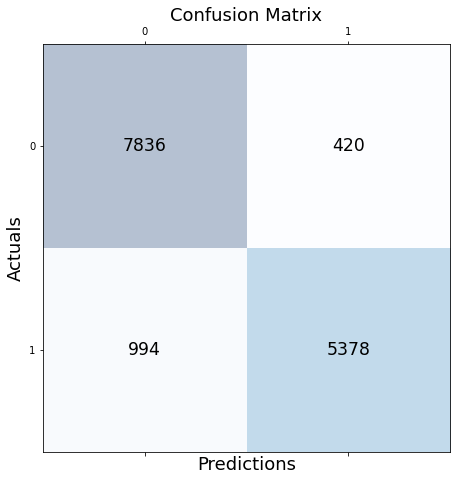

In [21]:
y_pred = loaded_model.predict(x_test)
conf_matrix = confusion_matrix(y_true=Y_test, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [22]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)

In [23]:
# calculate AUC
auc = roc_auc_score(Y_test, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.897


In [24]:
report = classification_report(Y_test, y_pred, output_dict=True)
classification_report_df = pd.DataFrame(report).transpose()
classification_report_df

,precision,recall,f1-score,support
0,0.887429,0.949128,0.917242,8256.000000
1,0.927561,0.844005,0.883813,6372.000000
accuracy,0.903336,0.903336,0.903336,0.903336
macro avg,0.907495,0.896566,0.900527,14628.000000
weighted avg,0.904911,0.903336,0.902680,14628.000000


In [25]:
print(x_train.shape)
print(x_test.shape)

(3657, 5000)
(14628, 5000)


In [28]:
vect_input = cv.transform([input_text])

In [29]:
vect_input.shape

(1, 5000)

In [30]:
loaded_model.predict(vect_input)

array([0])

In [15]:
df1 = pd.read_csv('./Data/cleaned.csv')

In [16]:
df1.isna().sum()

text     0
label    0
dtype: int64

In [12]:
df1.head()

,Unnamed: 0,text,label
0,0,house dem aide even see comey letter jason cha...,1
1,1,ever get feeling life circle roundabout rather...,0
2,2,truth might get fired october tension intellig...,1
3,3,video civilian killed single u airstrike ident...,1
4,4,print iranian woman sentenced six year prison ...,1


In [13]:
df1.dropna(inplace=True)

In [14]:
df1.to_csv('./Data/cleaned.csv', index=False)

In [17]:
X = df1['text']
Y = df1['label']
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.8, random_state=2)


In [19]:
cv = CountVectorizer(max_features=5000, ngram_range=(1, 3))
x_train = cv.fit_transform(X_train)
#x_test = cv.transform([X_test])


In [20]:
filename = './Model/fake_news_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
input_text = """PALO ALTO, Calif.  —   After years of scorning the political process, Silicon Valley has leapt into the fray. The prospect of a President Donald J. Trump is pushing the tech community to move beyond its traditional role as donors and to embrace a new existence as agitators and activists. A distinguished venture capital firm emblazoned on its corporate home page an earthy   epithet. One prominent tech chieftain says the consequences of Mr. Trump’s election would “range between disastrous and terrible. ” Another compares him to a dictator. And nearly 150 tech leaders signed an open letter decrying Mr. Trump and his campaign of “anger” and “bigotry. ” Not quite all the action is  . Peter Thiel, a founder of PayPal and Palantir who was the first outside investor in Facebook, spoke at the Republican convention in July. The New York Times reported on Saturday that Mr. Thiel is giving $1. 25 million to support Mr. Trump’s candidacy even as other supporters flee. (He also recently gave $1 million to a “super PAC” that supports Senator Rob Portman, the Republican freshman running for   in Ohio.) Getting involved in politics used to be seen as clashing with Silicon Valley’s value system: You transform the world by making problems obsolete, not solving them through Washington. Nor did entrepreneurs want to alienate whatever segment of customers did not agree with them politically. Such reticence is no longer in style here. “We’re a bunch of nerds not used to having a lot of limelight,” said Dave McClure, an investor who runs a tech incubator called 500 Startups. “But to quote   ‘With great power comes great responsibility. ’” Mr. McClure grew worried after the Republican and Democratic conventions as Mr. Trump began to catch up to Hillary Clinton in the polls. He wanted Silicon Valley to do more, and so late last month he announced Nerdz4Hillary, an informal   effort. An initial group of donors pledged $50, 000 the goal was to ask the “nerdz” for small donations to match that sum. They have not come through yet. “We’re kind of optimistic we’ll get the other $50, 000 in a few weeks,” Mr. McClure said. That relatively slow pace reflects Silicon Valley’s shifting position: Even as it becomes increasingly free with its opinions, it has been less free with its checkbook. The most recent data, from late August, shows Mrs. Clinton taking in $7. 7 million from the tech community, according to Crowdpac, a   that tracks donations. By that point in 2012, Crowdpac says, President Obama had raised $21 million from entrepreneurs and venture capitalists. Reid Hoffman, the billionaire   of the business networking site LinkedIn, offers a snapshot of Silicon Valley’s evolving approach to politics. Mr. Hoffman was a top Obama donor, giving $1 million to the Priorities USA political action committee, something several of his peers did as well. Last month, Mr. Hoffman garnered worldwide publicity for saying he would donate up to $5 million to veterans’ groups if Mr. Trump released his taxes, a remote possibility that never came to pass. He has castigated Mr. Trump in interviews, saying he was speaking for those who were afraid. Mr. Hoffman’s outright donations, however, have been smaller this election cycle. In May, he gave $400, 000 to the Hillary Victory Fund. Asked if there was more recent giving that had not shown up in federal election records, Mr. Hoffman cryptically responded in an email, “Looking at some PACs, etc. ” He declined several opportunities to elaborate. Even as Priorities USA has raised $133 million this election cycle, far exceeding its total in 2012, its tech contributions have dwindled. The only familiar tech name this time around is John Doerr of the venture capital firm Kleiner Perkins Caufield  Byers, who gave $500, 000. The AOL   Steve Case said his September endorsement of Mrs. Clinton, via an   in The Washington Post, was the first time he ever publicly declared for a candidate. “I always focused on policy and avoided politics,” he said. “But if Trump were elected president, I would be disappointed in myself for not acting. ” When he wrote the   he was uncertain about donating money to Mrs. Clinton, saying only that it was “probable. ” A spokeswoman said Sunday that Mr. Case gave $25, 000 to the Hillary Victory Fund. Mason Harrison, Crowdpac’s head of communications, offered a possible reason for Mrs. Clinton’s    support. “Donors give to support candidates they love, not to defeat candidates they fear,” he said. A few billionaires are acting instead of talking. Dustin Moskovitz, a founder of Facebook, said he was giving $20 million to various Democratic election efforts  —   the first time he and his wife, Cari Tuna, have endorsed a candidate. He declined to be interviewed. Part of the problem for Mrs. Clinton is that, however preferable she may be to Mr. Trump in the tech community, she pales in comparison to President Obama. After some initial misgivings, Silicon Valley found its champion in him. There has been a revolving door between tech and the Obama administration, just as previous Democratic administrations had a revolving door with Wall Street. In June, President Obama seemed to suggest that he might become a venture capitalist after his term ends. Mrs. Clinton is not as enthusiastic toward Silicon Valley and its disruptive ways. In a speech in the summer of 2015, she noted that   in the “  or   gig economy”  —   Uber, Airbnb and their ilk  —   were “unleashing innovation” but also “raising hard questions about workplace protection and what a good job will look like in the future. ” The Clinton campaign declined to comment. The Trump campaign did not respond to a query. Even as Silicon Valley works against Mr. Trump, there is quiet acknowledgment that his campaign has bared some important issues. In an endorsement this month of Mrs. Clinton, the venture capital firm Union Square Ventures pointed out that “the benefits of technology and globalization have not been evenly distributed,” and that this needed to change. If Silicon Valley’s political involvement outlasts this unusual election, the tech community may start contributing more to the process than commentary and cash. “Not only are tech people going to be wielding influence, but they’re going to be the candidate,” Mr. McClure said. “Reid Hoffman, Sheryl Sandberg”  —   the chief operating officer of Facebook  —   “and a bunch of other folks here have political aspirations. ” Others may be inspired to enter politics through other doors. Palmer Luckey is the    founder of the Oculus virtual reality company, which he sold to Facebook for $2 billion. Mr. Luckey donated $10, 000 to a group dedicated to spreading    messages about Mrs. Clinton both online and off. The group’s first billboard, said to be outside Pittsburgh, labeled her “Too Big to Jail. ” Mr. Luckey told The Daily Beast that his thinking “went along the lines of, ‘Hey, I have a bunch of money. I would love to see more of this stuff. ’” He added, “I thought it sounded like a real jolly good time. ” Many virtual reality developers were less happy, and Mr. Luckey quickly posted his regrets on Facebook. He declined to comment further. “If we’re going to be more vocal, we’ll have to live more transparently,” said Hunter Walk, a venture capitalist whose campaign to persuade tech companies to give workers Election Day off signed up nearly 300 firms, including Spotify, SurveyMonkey and TaskRabbit. “There will be a period of adjustment. ” But perhaps being vocal is a temporary condition after all. The venture firm CRV was in the spotlight at the end of August with its blunt   message, which included the earthy epithet. A few weeks later, it cleaned up its website. The partners went from employing a publicist to seek out attention to declining interviews. “We reached everyone we wanted to reach, and hopefully influenced opinions,” said Saar Gur, a CRV venture capitalist. “Then the buzz died down and we went back to our day jobs, which are super busy."""



In [22]:
clean_text = clean_up(input_text)
vectorized_input_text = cv.transform([clean_text])
prediction = loaded_model.predict(vectorized_input_text)

In [33]:
prediction[0]

1

In [34]:
int(prediction)

1